In [1]:
from pathlib import Path

folder = "C:/STEMMUS_SCOPE_data/global/canopy_height"
fname = "ETH_GlobalCanopyHeight_10m_2020_N51E003_Map.tif"

file = Path(folder) / fname

In [2]:
file

WindowsPath('C:/STEMMUS_SCOPE_data/global/canopy_height/ETH_GlobalCanopyHeight_10m_2020_N51E003_Map.tif')

In [3]:
import xarray as xr
ds = xr.open_dataset(file, engine="rasterio")
ds = ds.sortby(["x", "y"])

In [4]:
da_sel = ds.sel(x=slice(5.25,5.5), y=slice(52.25, 52.5)).band_data

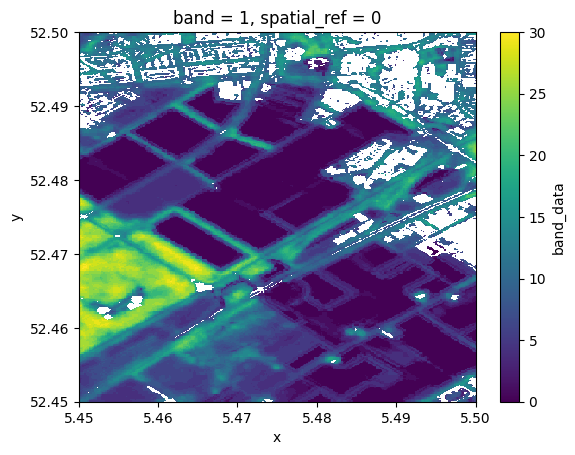

In [35]:
da_sel.plot()

In [34]:
import numpy as np

def find_nearest_non_nan(da, x, y):
    distance = ((da["x"] - x)**2 + (da["y"] - y)**2)**0.5
    distance = distance.where(~np.isnan(da), np.nan)
    return da.isel(distance.argmin(dim=["x","y"]))

canopy_height = find_nearest_non_nan(da_sel, x=5.481, y=52.473).values[0]